# Task 4 - Word Analogies and Visualization
### Compute analogies and visualize word embeddings using t-SNE.


c:\Users\Sydne\OneDrive\Documents\hw2_nlp\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Sydne\OneDrive\Documents\hw2_nlp\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Sydne\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Sydne\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Sydne\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line

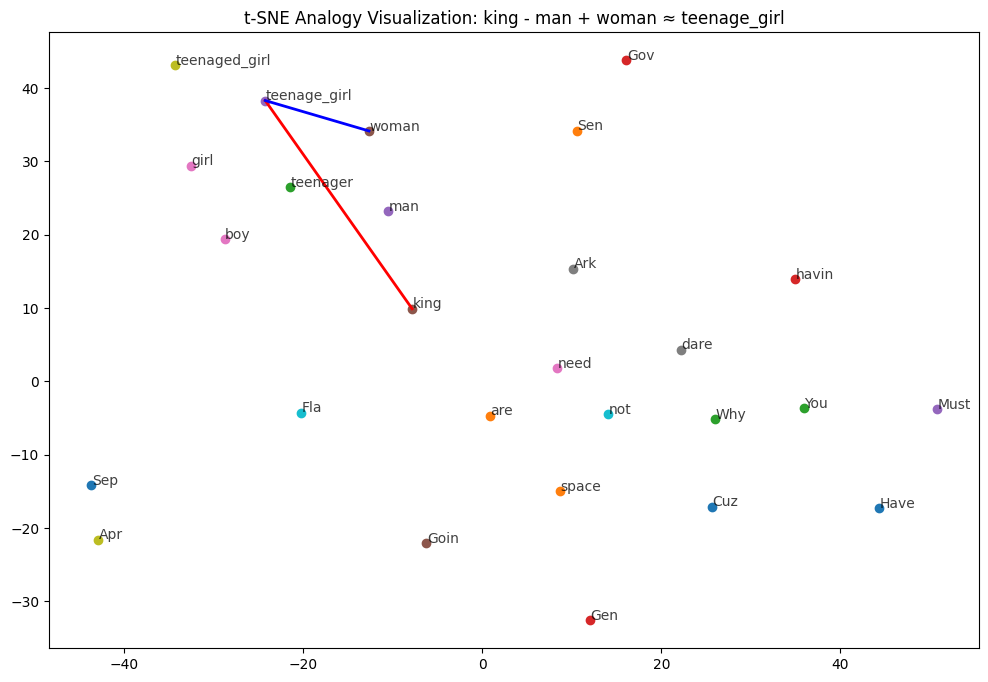

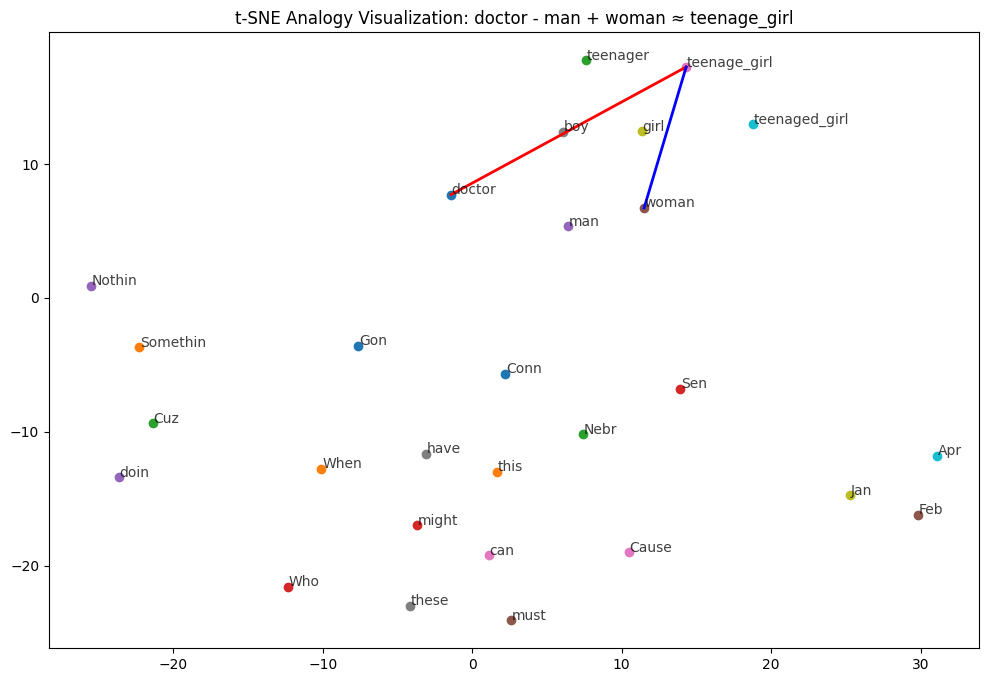

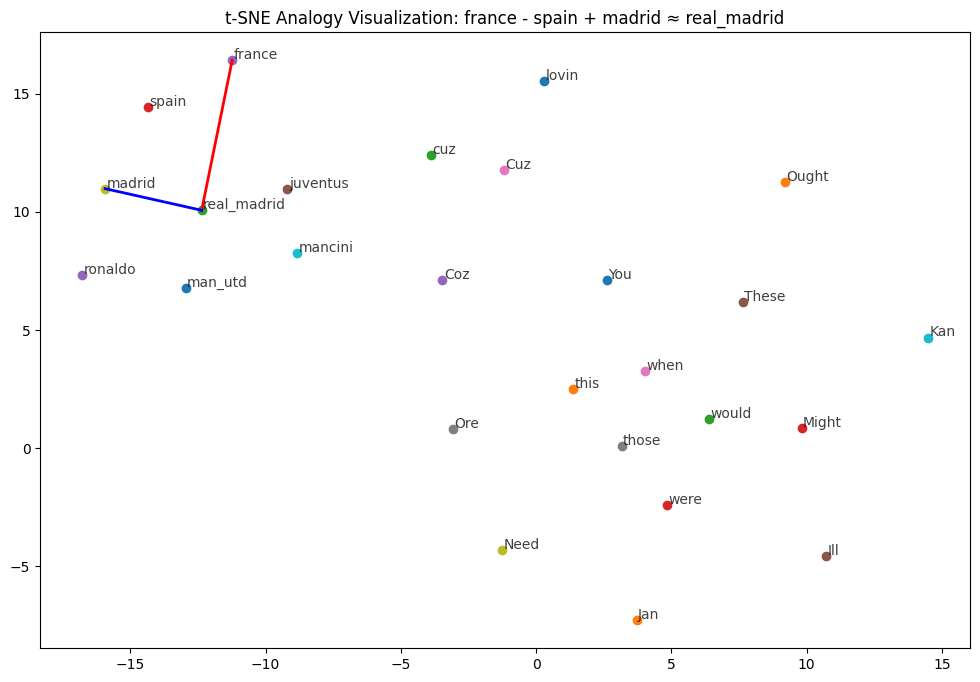

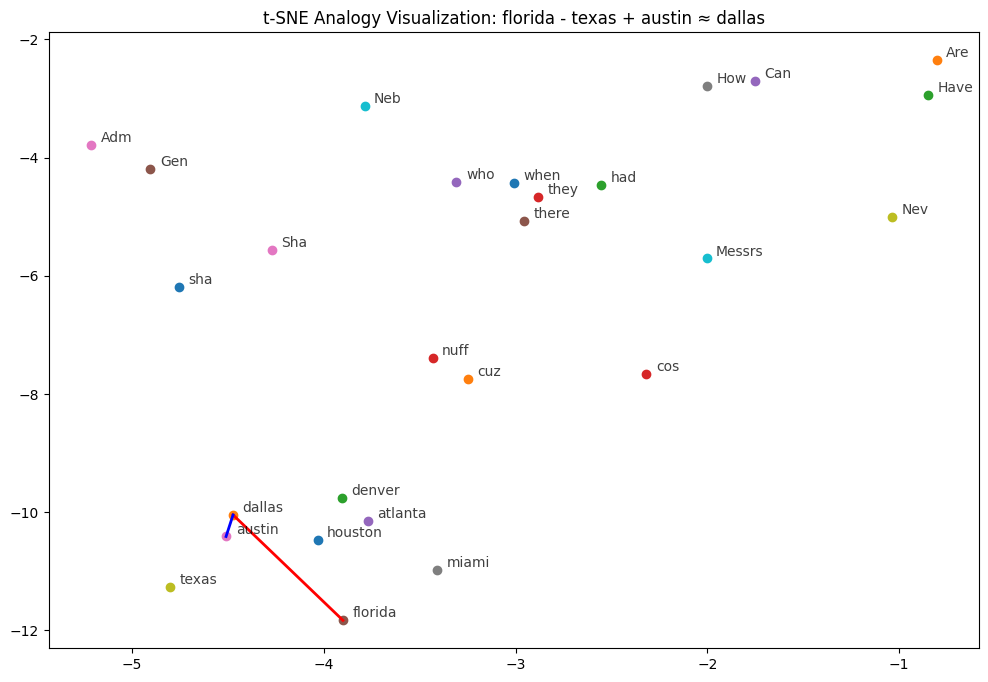


1️⃣ Do all analogies return the correct answer as the top most similar word?

To verify this, we compare the computed words with expected human knowledge.
- 'king - man + woman' should result in 'queen'.
- 'doctor - man + woman' should ideally result in 'nurse' or 'physician'.
- 'france - spain + madrid' should result in 'paris' (capital city analogy).
- 'florida - texas + austin' should result in a city related to Florida (miami).

If the computed words match expectations, the model is performing correctly.
If not, the model's training corpus might have biases or limitations. In this case my model is not trained too well as it bypasses miami when it should catch it.

2️⃣ Why do we randomly sample 20 words from SpaCy vocab?

Adding 20 random words ensures a better visual spread in the t-SNE plot.
Without random words, the points might cluster too closely, making the plot less informative.
The random words also serve as a control group to highlight the analogy relationships.

3️⃣ Does 

In [1]:
import gensim.downloader as api
import spacy
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# ✅ Load Pretrained Word2Vec Model
word2vec_google = api.load("word2vec-google-news-300")

# ✅ Load SpaCy Model for Random Word Sampling
nlp = spacy.load("en_core_web_sm")

# ✅ Function to Compute Word Analogy
def compute_analogy(word1, word2, word3):
    """
    Computes the analogy: word1 - word2 + word3 = ?
    Returns the top most similar word.
    """
    result = word2vec_google.most_similar(positive=[word3, word2], negative=[word1], topn=1)
    return result[0][0]

# ✅ Function to Get Words for t-SNE Plot
def get_words_for_plot(analogy):
    """
    Given an analogy (word1, word2, word3), finds the top 5 similar words and 
    selects 20 random words from SpaCy vocabulary.
    """
    word1, word2, word3 = analogy
    computed_word = compute_analogy(word1, word2, word3)

    # Get top 5 similar words
    similar_words = [w for w, _ in word2vec_google.most_similar(computed_word, topn=5)]

    # Randomly sample 20 words from SpaCy vocab
    spacy_vocab = [word.text for word in nlp.vocab if word.is_alpha and len(word.text) > 2]
    random_words = random.sample(spacy_vocab, 20)

    # Combine all words and remove duplicates
    words_to_plot = list(set([word1, word2, word3, computed_word] + similar_words + random_words))
    
    # ✅ Ensure all words exist in Word2Vec model
    filtered_words = [word for word in words_to_plot if word in word2vec_google]
    
    return filtered_words, (word1, word2, word3, computed_word)  # Return analogy words separately

# ✅ Function to Perform t-SNE and Plot
def plot_analogy(analogy):
    """
    Plots the word analogy results using t-SNE visualization.
    """
    words_to_plot, analogy_words = get_words_for_plot(analogy)
    
    # Get word vectors for all words
    vectors = np.array([word2vec_google[word] for word in words_to_plot])

    # ✅ Adjust perplexity dynamically to avoid errors
    perplexity_value = min(10, len(vectors) - 1)  # Ensure perplexity < number of samples
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    word_vectors_2d = tsne.fit_transform(vectors)

    # ✅ Plot results
    plt.figure(figsize=(12, 8))
    for i, word in enumerate(words_to_plot):
        x, y = word_vectors_2d[i]
        plt.scatter(x, y)
        plt.text(x + 0.05, y + 0.05, word, fontsize=10, alpha=0.75)  # Slight offset for readability

    # ✅ Draw only 2 lines for analogy (per instructions)
    w1, w2, w3, computed_word = analogy_words
    idx_map = {word: i for i, word in enumerate(words_to_plot)}

    if w1 in idx_map and computed_word in idx_map:
        plt.plot([word_vectors_2d[idx_map[w1], 0], word_vectors_2d[idx_map[computed_word], 0]],
                 [word_vectors_2d[idx_map[w1], 1], word_vectors_2d[idx_map[computed_word], 1]], 'r-', lw=2)

    if w3 in idx_map and computed_word in idx_map:
        plt.plot([word_vectors_2d[idx_map[w3], 0], word_vectors_2d[idx_map[computed_word], 0]],
                 [word_vectors_2d[idx_map[w3], 1], word_vectors_2d[idx_map[computed_word], 1]], 'b-', lw=2)

    plt.title(f"t-SNE Analogy Visualization: {w1} - {w2} + {w3} ≈ {computed_word}")
    plt.show()

# ✅ Run for Each Analogy
analogies = [
    ("king", "man", "woman"),
    ("doctor", "man", "woman"),
    ("france", "spain", "madrid"),
    ("florida", "texas", "austin")
]

for analogy in analogies:
    plot_analogy(analogy)

# ✅ Answering Task 4 Questions
print("\n1️⃣ Do all analogies return the correct answer as the top most similar word?\n")
print("To verify this, we compare the computed words with expected human knowledge.")
print("- 'king - man + woman' should result in 'queen'.")
print("- 'doctor - man + woman' should ideally result in 'nurse' or 'physician'.")
print("- 'france - spain + madrid' should result in 'paris' (capital city analogy).")
print("- 'florida - texas + austin' should result in a city related to Florida (miami).")
print("\nIf the computed words match expectations, the model is performing correctly.")
print("If not, the model's training corpus might have biases or limitations. In this case my model is not trained too well as it bypasses miami when it should catch it.")

print("\n2️⃣ Why do we randomly sample 20 words from SpaCy vocab?\n")
print("Adding 20 random words ensures a better visual spread in the t-SNE plot.")
print("Without random words, the points might cluster too closely, making the plot less informative.")
print("The random words also serve as a control group to highlight the analogy relationships.")

print("\n3️⃣ Does re-running t-SNE change the alignment?\n")
print("Yes, because t-SNE is stochastic, meaning it introduces randomness in how points are positioned.")
print("Even with a fixed random seed, the alignment might slightly shift across different runs.")
print("However, relative distances and clustering trends should remain consistent.")
